In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

In [3]:
tab = pd.read_csv('data/HMD/Deaths_1x1.txt', delim_whitespace=True, skiprows=1)

In [4]:
tab.head()

,Year,Age,Female,Male,Total
0,1933,0,52615.77,68438.11,121053.88
1,1933,1,8917.13,10329.16,19246.29
2,1933,2,4336.92,5140.05,9476.97
3,1933,3,3161.59,3759.88,6921.47
4,1933,4,2493.84,2932.59,5426.43


In [5]:
tab.Year.unique()

array([1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [6]:
tab.Age = tab.Age.replace(to_replace = {'110+': '110'})

In [7]:
tab['Age'] = pd.to_numeric(tab['Age'])


In [8]:
tab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9657 entries, 0 to 9656
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    9657 non-null   int64  
 1   Age     9657 non-null   int64  
 2   Female  9657 non-null   float64
 3   Male    9657 non-null   float64
 4   Total   9657 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 377.4 KB


In [9]:
duplicate_rows_df = tab[tab.duplicated()]
print(duplicate_rows_df.shape)

(0, 5)


In [10]:
tab.isnull().sum()

Year      0
Age       0
Female    0
Male      0
Total     0
dtype: int64

<AxesSubplot:xlabel='Year'>

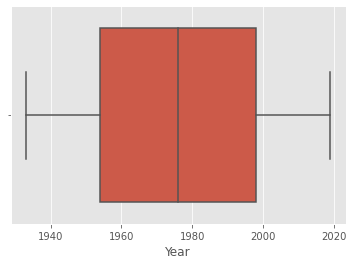

In [11]:
sns.boxplot(x=tab['Year'])

<AxesSubplot:xlabel='Age'>

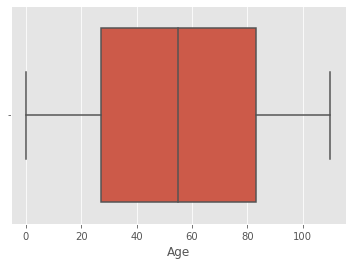

In [12]:
sns.boxplot(x=tab['Age'])

<AxesSubplot:xlabel='Female'>

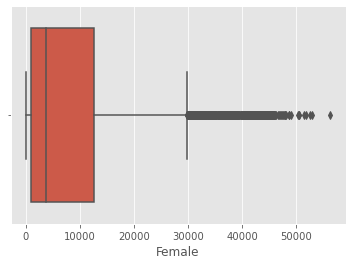

In [13]:
sns.boxplot(x=tab['Female'])

<AxesSubplot:xlabel='Male'>

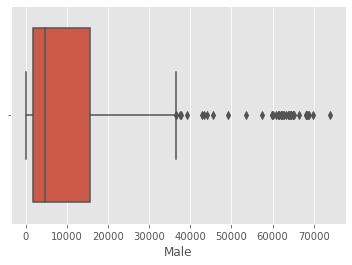

In [14]:
sns.boxplot(x=tab['Male'])

<AxesSubplot:xlabel='Total'>

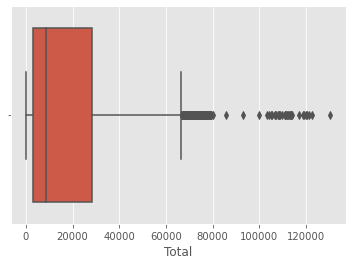

In [15]:
sns.boxplot(x=tab['Total'])

In [16]:
Q1 = tab.quantile(0.25)
Q3 = tab.quantile(0.75)
IQR = Q3-Q1
print(IQR)


Year         44.00
Age          56.00
Female    11532.72
Male      13896.71
Total     25449.89
dtype: float64


In [17]:
tab2 = tab[~((tab < (Q1-1.5 * IQR)) |(tab > (Q3 + 1.5 * IQR))).any(axis=1)]
tab2.shape

(9124, 5)

In [18]:
yrs = tab.groupby('Year')

In [19]:
yrs.head()

,Year,Age,Female,Male,Total
0,1933,0,52615.77,68438.11,121053.88
1,1933,1,8917.13,10329.16,19246.29
2,1933,2,4336.92,5140.05,9476.97
3,1933,3,3161.59,3759.88,6921.47
4,1933,4,2493.84,2932.59,5426.43
...,...,...,...,...,...
9546,2019,0,9248.30,11675.82,20924.12
9547,2019,1,651.02,824.06,1475.08
9548,2019,2,399.02,515.04,914.06
9549,2019,3,320.01,390.02,710.03


In [20]:
age = tab.pivot(index='Year', columns=['Age'], values='Total')

In [21]:
age.head()

Age,0,1,2,3,4,5,6,7,8,9,...,101,102,103,104,105,106,107,108,109,110
Year,,,,,,,,,,,,,,,,,,,,,
1933,121053.88,19246.29,9476.97,6921.47,5426.43,4677.40,4277.46,3924.37,3618.17,3358.84,...,261.04,183.53,127.23,86.96,58.58,38.90,25.46,16.43,10.44,14.81
1934,130341.42,20471.40,10220.19,7077.46,5457.52,4706.44,4309.64,3962.92,3666.28,3419.74,...,282.48,199.03,138.28,94.73,63.98,42.58,27.94,18.06,11.50,16.44
1935,120250.92,16746.56,8498.92,6336.89,5258.86,4591.63,4166.12,3814.42,3536.52,3332.45,...,274.74,196.23,135.57,92.30,61.95,40.95,26.68,17.11,10.82,15.13
1936,122649.98,17116.92,8483.88,5903.47,4821.47,4231.80,3874.71,3577.10,3339.01,3160.41,...,283.93,202.41,141.16,95.11,63.10,41.20,26.50,16.77,10.45,13.89
1937,120023.27,16279.38,8254.28,5469.16,4415.37,3869.89,3523.42,3233.04,2998.75,2820.54,...,253.64,175.56,122.52,83.63,55.14,35.79,22.86,14.37,8.90,11.44


In [22]:
age.shape

(87, 111)

In [23]:
age.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
           dtype='int64', name='Age', length=111)

Text(0, 0.5, 'Number of Deaths in single-year age groups')

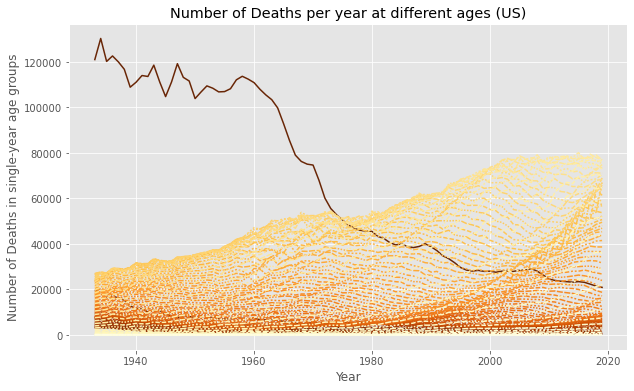

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=age, legend=None, palette='YlOrBr_r')
plt.title('Number of Deaths per year at different ages (US)')
plt.xlabel('Year')
plt.ylabel('Number of Deaths in single-year age groups')


In [ ]:
yrs = tab.pivot(index='Age', columns=['Year'], values='Total')

In [139]:
yrs.head()

Year,1933,1934,1935,1936,1937,1938,1939,1940,1941,1942,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Age,,,,,,,,,,,,,,,,,,,,,
0,121053.88,130341.42,120250.92,122649.98,120023.27,116789.43,108924.29,111117.97,114049.46,113634.51,...,24587.29,23986.32,23630.42,23441.25,23216.49,23456.23,23162.20,22336.06,21469.14,20924.12
1,19246.29,20471.40,16746.56,17116.92,16279.38,15314.32,12722.04,11723.03,11577.10,10079.41,...,1734.08,1671.09,1627.09,1657.08,1460.09,1594.08,1567.08,1521.08,1450.08,1475.08
2,9476.97,10220.19,8498.92,8483.88,8254.28,7492.55,6197.42,5947.13,5756.05,5011.24,...,1104.06,1063.07,1079.06,1016.06,987.06,1004.06,1047.06,988.06,1045.06,914.06
3,6921.47,7077.46,6336.89,5903.47,5469.16,5137.82,4455.19,3882.64,3955.45,3794.71,...,844.06,837.05,820.06,750.04,740.06,778.06,791.05,773.03,745.04,710.03
4,5426.43,5457.52,5258.86,4821.47,4415.37,3898.89,3531.51,3154.77,3034.64,2995.70,...,634.02,674.03,692.04,645.02,644.05,589.02,640.02,598.02,590.02,576.02


<AxesSubplot:xlabel='Age'>

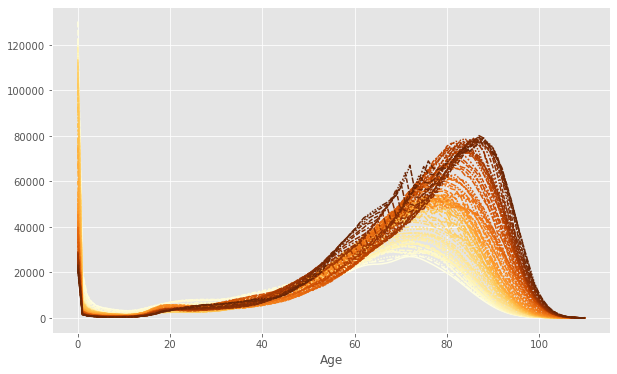

In [143]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=yrs, legend=None, palette='YlOrBr')

<AxesSubplot:xlabel='Year', ylabel='Male'>

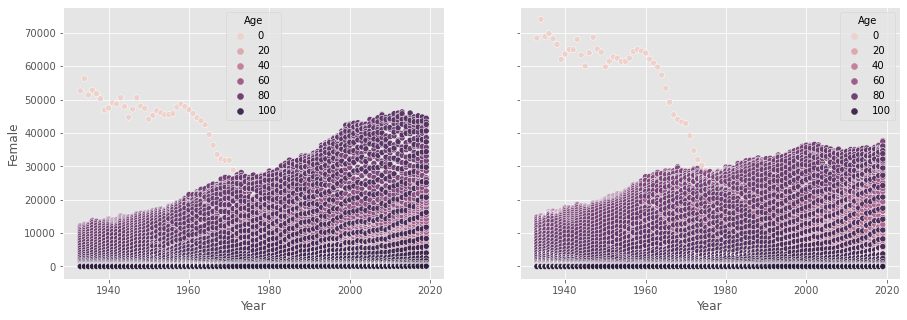

In [161]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(x='Year', y='Female', data=tab, hue='Age', ax=ax[0])
sns.scatterplot(x='Year', y='Male', data=tab, hue='Age', ax=ax[1])
